# Atividade 01 - Parte 01
### Desenvolvedores: Bruno Pavei e Cecília Fonseca
### Empreendimento: Primo Tedesco

Capítulo 10.2 da AP42, pois o empreendimento é uma indústria de papel

In [2]:
# Utilizando Pandas para abrir a planilha
import pandas as pd
import os

# Coletando o caminho da pasta que estou
cwd = os.getcwd()
#print(cwd)

# Pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE'
print(path)

# Indicando nome do arquivo
chapterNumer = 10
subChapter = 2
file = 'chp_'+str(chapterNumer)+'_'+str(subChapter)+'.csv'
print(file)

# Abrindo arquivo utilizando o Pandas
fe = pd.read_csv(path + '\\'+file)
print(fe)

C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\tabelas\FE
chp_10_2.csv
                  Source     PM   SO2    CO  HidrogenSulfide   RSH
0        Digester relief    NaN   NaN   NaN            0.020  0.60
1                 Washer    NaN   NaN   NaN            0.010  0.20
2             Evaporator    NaN   NaN   NaN            0.550  0.05
3        Recovery boiler   90.0  3.50  5.50            6.000  1.50
4  Noncontact Evaporator  115.0   NaN  5.50            0.050   NaN
5        Dissolving tank    3.5  0.10   NaN            0.100  0.15
6                   Kiln   28.0  0.15  0.05            0.250  0.10
7              Condenser    NaN   NaN   NaN            0.005  0.25


62672.5
1
2
3
4
5


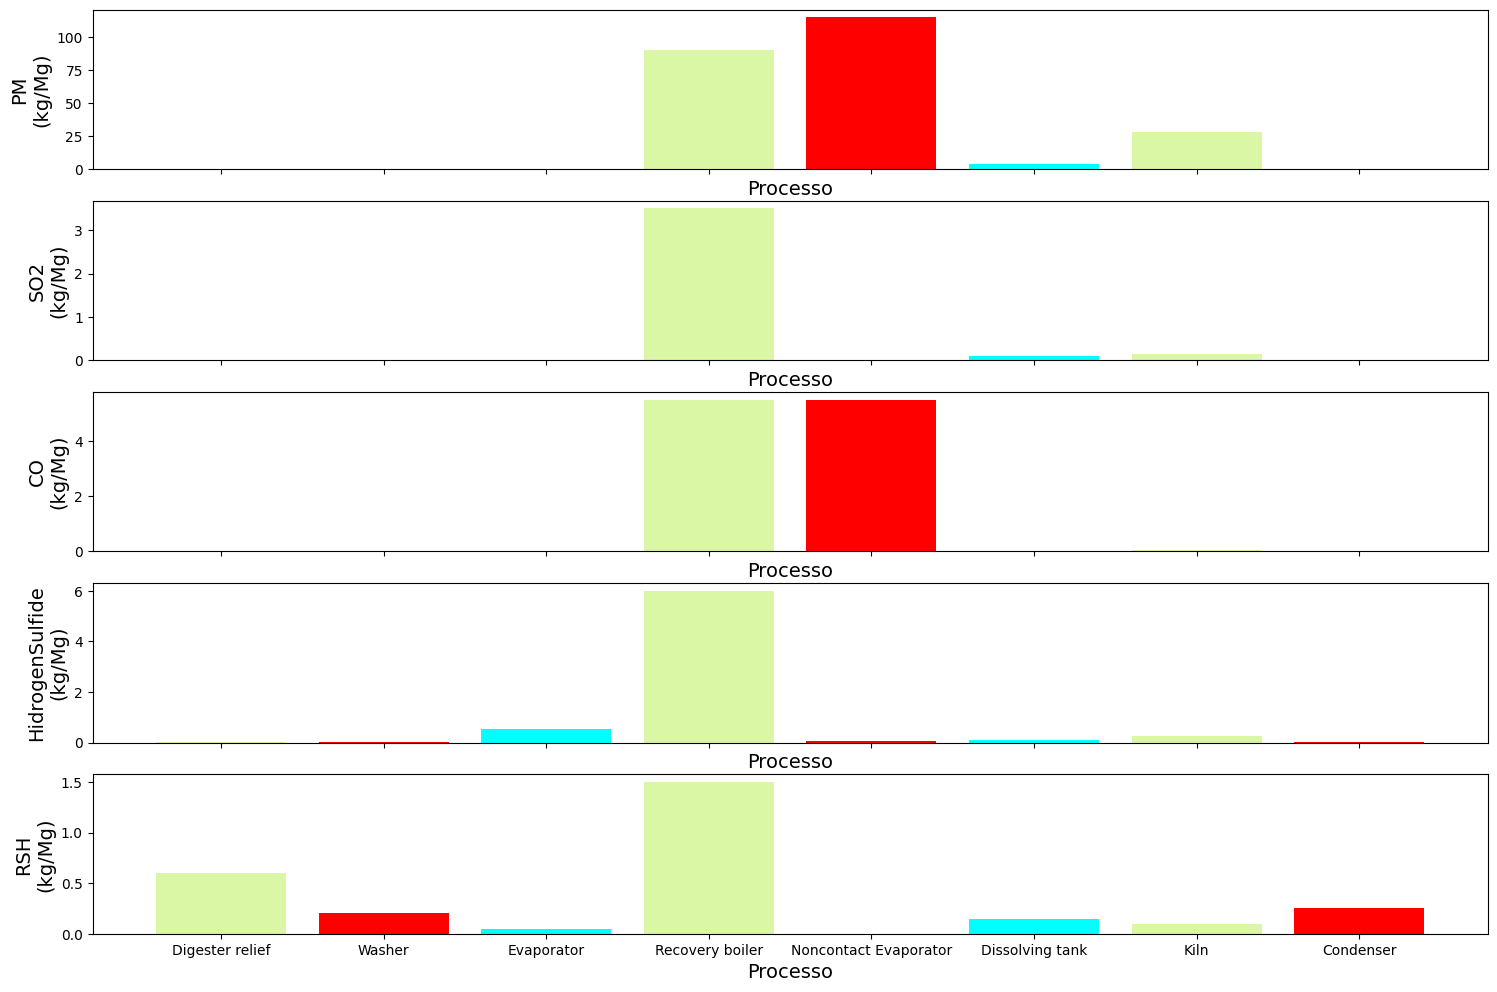

In [3]:
# Plotando os fatores de emissão
import matplotlib.pyplot as plt

atv = 265 # Considerando a taxa de atividade
emis = fe['PM']*atv

#Somando dataframe
print(emis.sum())

# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
# sharex significa compartilhar o eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True, figsize=(18, 12))

for ii in range(1,len(fe.columns)):
    print(ii)
    ax[ii-1].bar(fe['Source'],fe.iloc[:,ii],color = ['#DAF7A6','red','cyan'])
    ax[ii-1].set_xlabel('Processo', fontsize=14)
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(kg/Mg)', fontsize=14)

# Salva a figura na pasta Figuras
fig.savefig(cwd+'\\Figuras\\barplot_fatorEmiss.png')

## Criando taxa de atividade com sazonalidade

In [4]:
# Criar um vetor com as datas
from datetime import datetime, timedelta

# Definindo a data inicial e final
data_inicial = datetime(2023, 1, 1)
data_final = datetime(2023, 12, 31)

# Definindo o passo (intervalo entre as datas)
passo = timedelta(days=1)

# Criando o vetor de datas
vetor_datas = []
data_atual = data_inicial
while data_atual <= data_final:
    vetor_datas.append(data_atual)
    data_atual += passo

# Exibindo o vetor de datas
for data in vetor_datas:
    print(data)

2023-01-01 00:00:00
2023-01-02 00:00:00
2023-01-03 00:00:00
2023-01-04 00:00:00
2023-01-05 00:00:00
2023-01-06 00:00:00
2023-01-07 00:00:00
2023-01-08 00:00:00
2023-01-09 00:00:00
2023-01-10 00:00:00
2023-01-11 00:00:00
2023-01-12 00:00:00
2023-01-13 00:00:00
2023-01-14 00:00:00
2023-01-15 00:00:00
2023-01-16 00:00:00
2023-01-17 00:00:00
2023-01-18 00:00:00
2023-01-19 00:00:00
2023-01-20 00:00:00
2023-01-21 00:00:00
2023-01-22 00:00:00
2023-01-23 00:00:00
2023-01-24 00:00:00
2023-01-25 00:00:00
2023-01-26 00:00:00
2023-01-27 00:00:00
2023-01-28 00:00:00
2023-01-29 00:00:00
2023-01-30 00:00:00
2023-01-31 00:00:00
2023-02-01 00:00:00
2023-02-02 00:00:00
2023-02-03 00:00:00
2023-02-04 00:00:00
2023-02-05 00:00:00
2023-02-06 00:00:00
2023-02-07 00:00:00
2023-02-08 00:00:00
2023-02-09 00:00:00
2023-02-10 00:00:00
2023-02-11 00:00:00
2023-02-12 00:00:00
2023-02-13 00:00:00
2023-02-14 00:00:00
2023-02-15 00:00:00
2023-02-16 00:00:00
2023-02-17 00:00:00
2023-02-18 00:00:00
2023-02-19 00:00:00


In [5]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas com frequência horária
datas = pd.date_range(start='2023-01-01 00:00:00', end='2023-12-31 00:00:00', freq='h')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month

# Mostrar o DataFrame resultante
print(df)

                    Data  Mes
0    2023-01-01 00:00:00    1
1    2023-01-01 01:00:00    1
2    2023-01-01 02:00:00    1
3    2023-01-01 03:00:00    1
4    2023-01-01 04:00:00    1
...                  ...  ...
8732 2023-12-30 20:00:00   12
8733 2023-12-30 21:00:00   12
8734 2023-12-30 22:00:00   12
8735 2023-12-30 23:00:00   12
8736 2023-12-31 00:00:00   12

[8737 rows x 2 columns]


In [6]:
# Criando dataframe com datas e valores de atividade máx e mín
import pandas as pd
import numpy as np

atvMax = (265/24)
atvMin = (150/24) 

# Criando atividade 
atv = (atvMax - atvMin)*np.random.rand(len(df)) + atvMin
df['Atividade'] = atv
print(df)
df.to_csv(r"C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\tabelas\ativ.csv")

                    Data  Mes  Atividade
0    2023-01-01 00:00:00    1   9.971714
1    2023-01-01 01:00:00    1   7.446270
2    2023-01-01 02:00:00    1   9.206794
3    2023-01-01 03:00:00    1   8.806428
4    2023-01-01 04:00:00    1   9.454116
...                  ...  ...        ...
8732 2023-12-30 20:00:00   12   9.333110
8733 2023-12-30 21:00:00   12  10.876906
8734 2023-12-30 22:00:00   12   9.280628
8735 2023-12-30 23:00:00   12  10.551204
8736 2023-12-31 00:00:00   12   7.775983

[8737 rows x 3 columns]


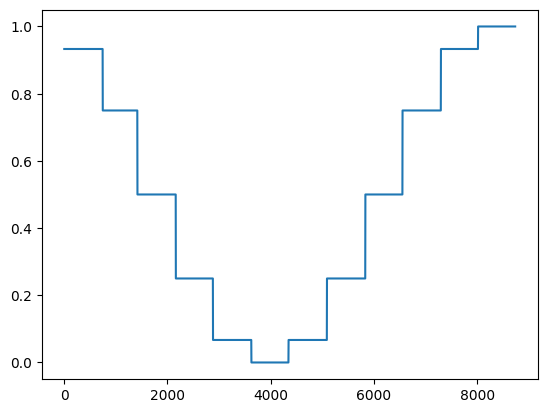

In [7]:
# Criando componente sazonal

sazonalidade = 0.5*(np.cos(2*np.pi*df['Mes']/12)+1)
plt.plot(sazonalidade)
df['Sazonalidade'] = sazonalidade 
df.to_csv(r"C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\tabelas\ativ.csv")

                    Data  Mes  Atividade  Sazonalidade  Atividade_Sazonal
0    2023-01-01 00:00:00    1   9.971714      0.933013           9.303736
1    2023-01-01 01:00:00    1   7.446270      0.933013           6.947464
2    2023-01-01 02:00:00    1   9.206794      0.933013           8.590056
3    2023-01-01 03:00:00    1   8.806428      0.933013           8.216509
4    2023-01-01 04:00:00    1   9.454116      0.933013           8.820810
...                  ...  ...        ...           ...                ...
8732 2023-12-30 20:00:00   12   9.333110      1.000000           9.333110
8733 2023-12-30 21:00:00   12  10.876906      1.000000          10.876906
8734 2023-12-30 22:00:00   12   9.280628      1.000000           9.280628
8735 2023-12-30 23:00:00   12  10.551204      1.000000          10.551204
8736 2023-12-31 00:00:00   12   7.775983      1.000000           7.775983

[8737 rows x 5 columns]


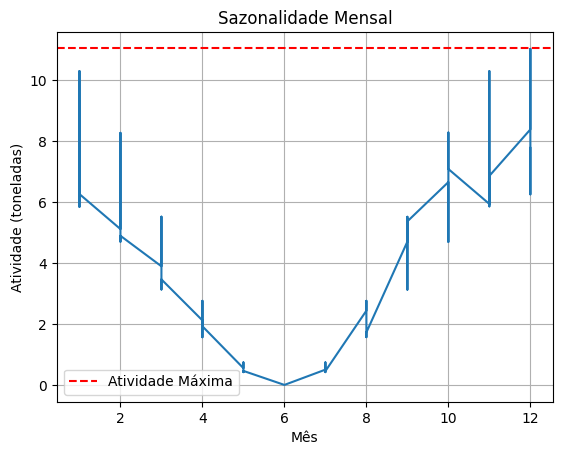

In [36]:
# Valores de atividade máx e mín com sazonalidade

atividade_sazonal = atv * sazonalidade
df['Atividade_Sazonal'] = atividade_sazonal 
print(df)

plt.plot(df['Mes'], df['Atividade_Sazonal'])
plt.xlabel('Mês')
plt.ylabel('Atividade (toneladas)')
plt.axhline(y=atvMax, color='r', linestyle='--', label='Atividade Máxima')
plt.legend()
plt.title('Sazonalidade Mensal')
plt.grid(True)

df.to_csv(r"C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\tabelas\ativ.csv")
fig.savefig(cwd+'\\Figuras\\Atividade_Sazonal.png')

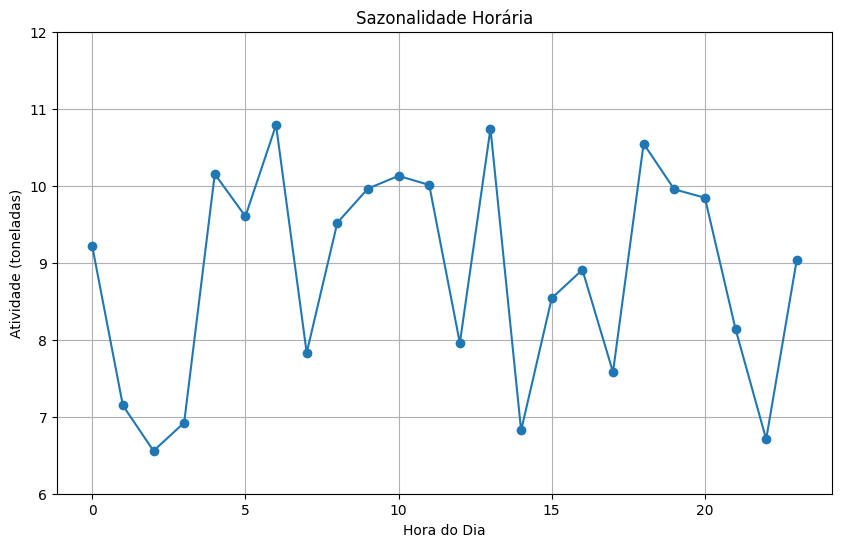

In [9]:
# Gerar variações horárias utilizando o Método de Monte Carlo
num_horas_dia = 24

variacoes_horarias = np.random.uniform(atvMin - atvMax, 0, num_horas_dia)

# Calcular os valores de atividade máxima variáveis para cada hora do dia
atividades_maximas_variaveis = atvMax + variacoes_horarias


# Plotar os valores de sazonalidade horária
plt.figure(figsize=(10, 6))
plt.plot(range(num_horas_dia), atividades_maximas_variaveis, marker='o')
#plt.axhline(y=atvMax, color='r', linestyle='--', label='Atividade Máxima')
plt.title('Sazonalidade Horária')
plt.xlabel('Hora do Dia')
plt.ylabel('Atividade (toneladas)')
plt.ylim(6, 12)  
#plt.legend()
plt.grid(True)
plt.show()
fig.savefig(cwd+'\\Figuras\\Sazonalidade_Horaria_MC.png')

##### Plotando a sazonalidade aleatória do vetor de atividade horária já criado.

           Data      Hora  Atividade_Sazonal
240  2023-01-11  00:00:00           8.069817
241  2023-01-11  01:00:00           8.943241
242  2023-01-11  02:00:00           8.251426
243  2023-01-11  03:00:00           5.902270
244  2023-01-11  04:00:00          10.044221
245  2023-01-11  05:00:00           9.432523
246  2023-01-11  06:00:00           7.388458
247  2023-01-11  07:00:00           9.730408
248  2023-01-11  08:00:00           6.731784
249  2023-01-11  09:00:00           8.373815
250  2023-01-11  10:00:00           8.588835
251  2023-01-11  11:00:00           6.496259
252  2023-01-11  12:00:00           8.917236
253  2023-01-11  13:00:00           8.766351
254  2023-01-11  14:00:00           7.256280
255  2023-01-11  15:00:00           6.257637
256  2023-01-11  16:00:00           6.409298
257  2023-01-11  17:00:00           8.184829
258  2023-01-11  18:00:00           7.321373
259  2023-01-11  19:00:00           9.311020
260  2023-01-11  20:00:00           9.038063
261  2023-

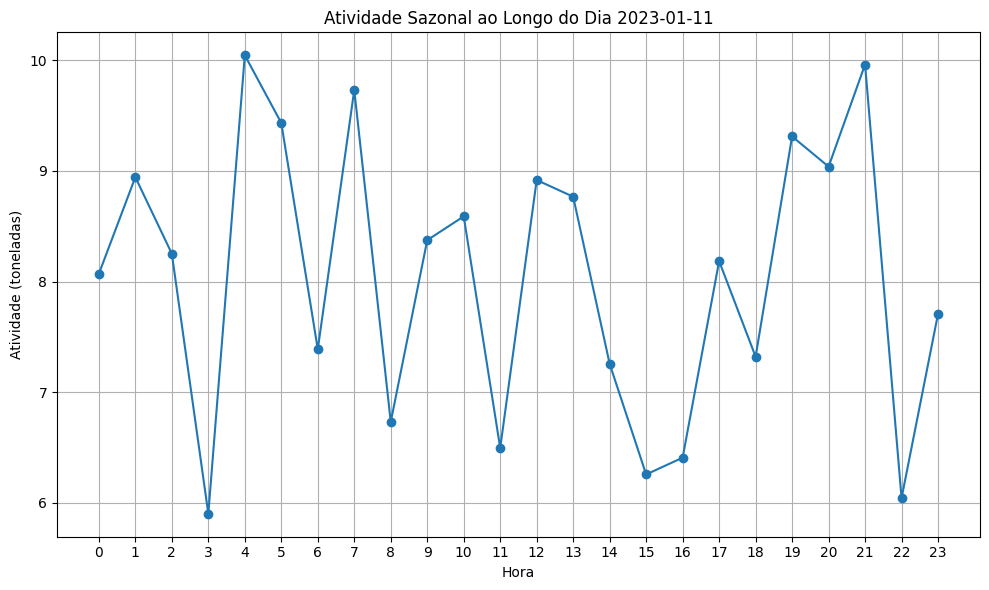

In [11]:
caminho_arquivo = r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\tabelas\ativ.csv'
dados = pd.read_csv(caminho_arquivo)

# Separar os valores de data e hora
dados['Data'] = pd.to_datetime(dados['Data'])  # Converter para tipo datetime
dados['Hora'] = dados['Data'].dt.time  # Extrair a hora
dados['Data'] = dados['Data'].dt.date  # Extrair a data

# Escolher aleatoriamente um dia do ano
data_aleatoria = np.random.choice(dados['Data'].unique())

# Filtrar todas as linhas que contenham o dia aleatório escolhido
# Considerando a data completa, incluindo hora
linhas_dia_aleatorio = dados[dados['Data'] == data_aleatoria]

# Mostrar apenas os valores das colunas "Data" e "Atividade_Sazonal"
print(linhas_dia_aleatorio[['Data','Hora', 'Atividade_Sazonal']])

horas = range(24)
data_grafico = linhas_dia_aleatorio['Data'].iloc[0]
# Plotar um gráfico de linha 
plt.figure(figsize=(10, 6))
plt.plot(horas, linhas_dia_aleatorio['Atividade_Sazonal'], marker='o', linestyle='-')
plt.title(f'Atividade Sazonal ao Longo do Dia {data_grafico}')
plt.xlabel('Hora')
plt.ylabel('Atividade (toneladas)')
plt.xticks(horas)  # Definir os ticks do eixo x como as horas de 0 a 23
plt.grid(True)
plt.tight_layout()
plt.show()
fig.savefig(cwd+'\\Figuras\\Sazonalidade_Horaria.png')

## Fatores de emissão com sazonalidade mensal

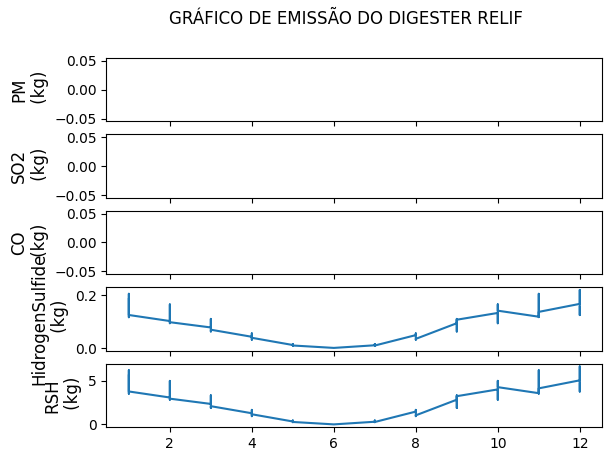

In [26]:
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True)
fig.suptitle('GRÁFICO DE EMISSÃO DO DIGESTER RELIF')
for ii in range(1,len(fe.columns)):
    ax[ii-1].plot(df['Mes'], df['Atividade_Sazonal']*fe.iloc[0,ii])
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (kg)', fontsize = 12)

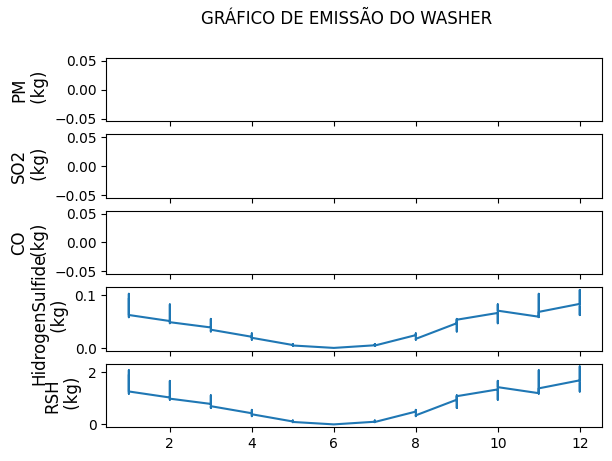

In [27]:
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True)
fig.suptitle('GRÁFICO DE EMISSÃO DO WASHER')
for ii in range(1,len(fe.columns)):
    ax[ii-1].plot(df['Mes'], df['Atividade_Sazonal']*fe.iloc[1,ii])
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (kg)', fontsize = 12)

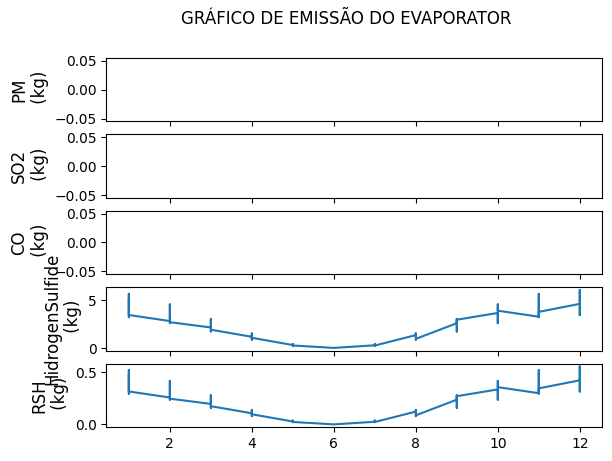

In [29]:
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True)
fig.suptitle('GRÁFICO DE EMISSÃO DO EVAPORATOR')
for ii in range(1,len(fe.columns)):
    ax[ii-1].plot(df['Mes'], df['Atividade_Sazonal']*fe.iloc[2,ii])
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (kg)', fontsize = 12)

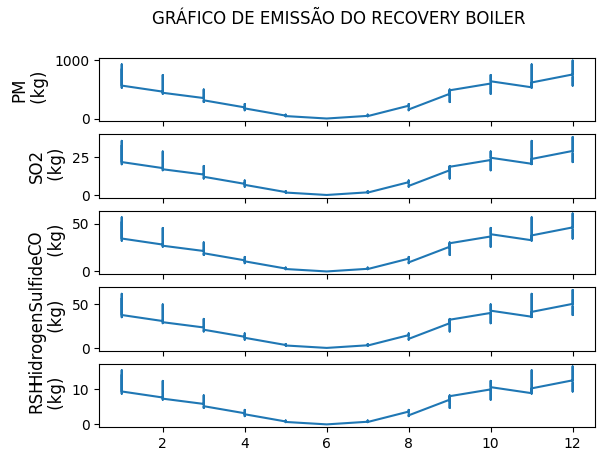

In [30]:
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True)
fig.suptitle('GRÁFICO DE EMISSÃO DO RECOVERY BOILER')
for ii in range(1,len(fe.columns)):
    ax[ii-1].plot(df['Mes'], df['Atividade_Sazonal']*fe.iloc[3,ii])
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (kg)', fontsize = 12)

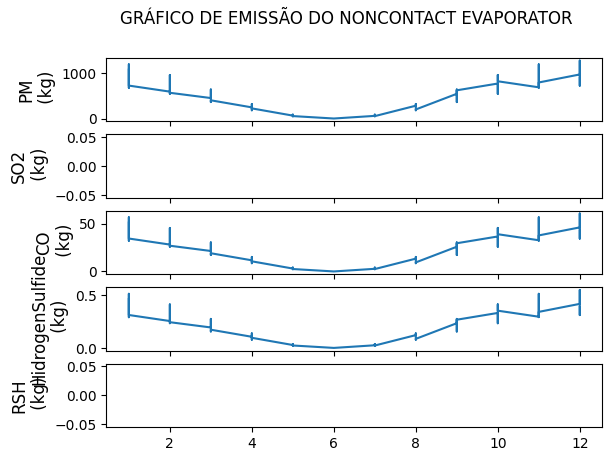

In [31]:
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True)
fig.suptitle('GRÁFICO DE EMISSÃO DO NONCONTACT EVAPORATOR')
for ii in range(1,len(fe.columns)):
    ax[ii-1].plot(df['Mes'], df['Atividade_Sazonal']*fe.iloc[4,ii])
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (kg)', fontsize = 12)

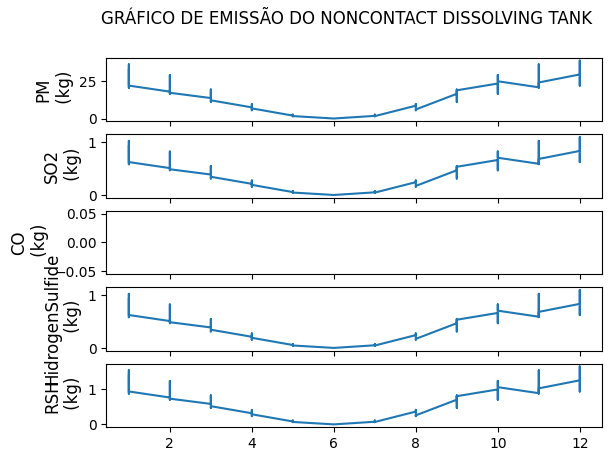

In [32]:
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True)
fig.suptitle('GRÁFICO DE EMISSÃO DO NONCONTACT DISSOLVING TANK')
for ii in range(1,len(fe.columns)):
    ax[ii-1].plot(df['Mes'], df['Atividade_Sazonal']*fe.iloc[5,ii])
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (kg)', fontsize = 12)

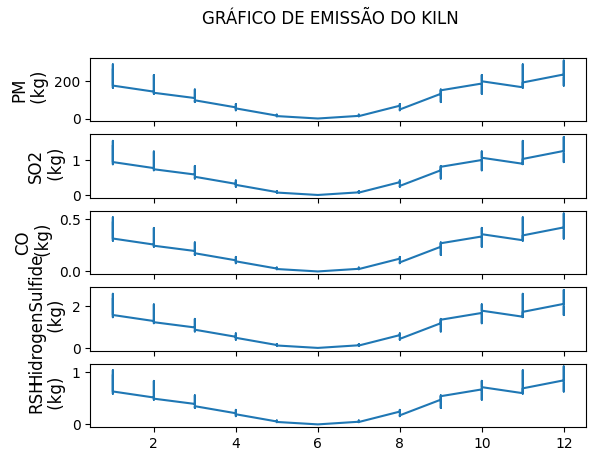

In [33]:
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True)
fig.suptitle('GRÁFICO DE EMISSÃO DO KILN')
for ii in range(1,len(fe.columns)):
    ax[ii-1].plot(df['Mes'], df['Atividade_Sazonal']*fe.iloc[6,ii])
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (kg)', fontsize = 12)

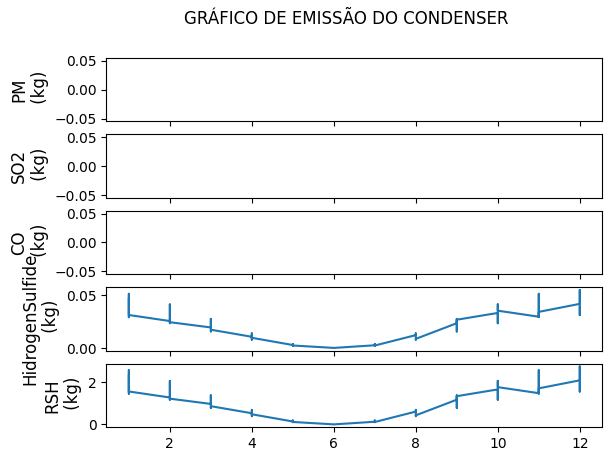

In [34]:
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True)
fig.suptitle('GRÁFICO DE EMISSÃO DO CONDENSER')
for ii in range(1,len(fe.columns)):
    ax[ii-1].plot(df['Mes'], df['Atividade_Sazonal']*fe.iloc[7,ii])
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (kg)', fontsize = 12)